In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [71]:
df = pd.read_csv("Student_performance_data _.csv")
df['GPA'] = (df['GPA'] / 4) * 5
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  3.661494         2.0  
1             0  3

Root Mean Squared Error: 0.2477730019658494
RMSE of non-scaled: 0.2477730019658493


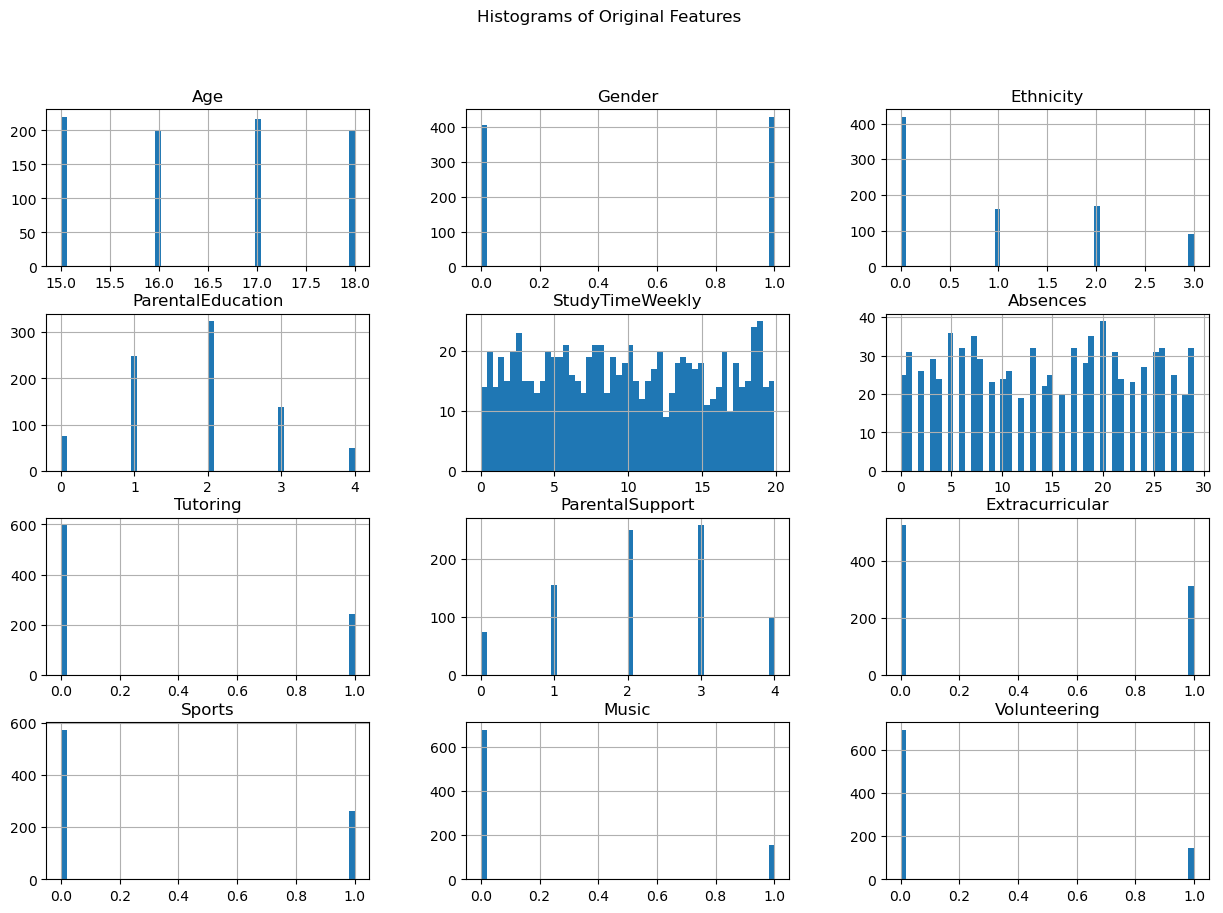

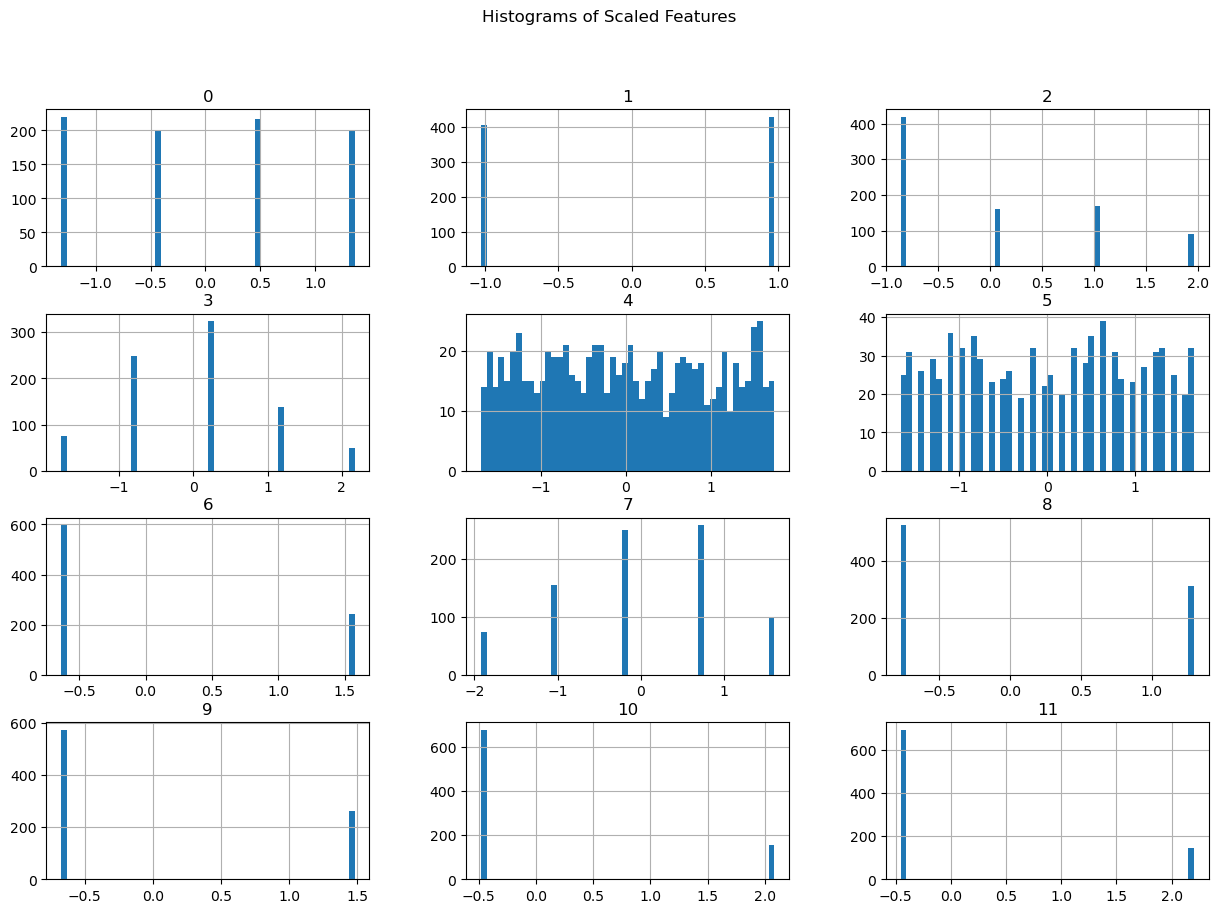

In [72]:
X = df.drop(columns=['StudentID', 'GPA' ,'GradeClass'])
y = df['GPA']

#Splits data to 70/15/15 for train, test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

model = LinearRegression()
model_no_scaling = LinearRegression()
scaler = StandardScaler()

model_no_scaling.fit(X_train, y_train)
y_val_pred_no_scaling = model_no_scaling.predict(X_val)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)

rmse = root_mean_squared_error(y_val, y_val_pred)
rmse_no_scaling = root_mean_squared_error(y_val, y_val_pred_no_scaling)

print(f"Root Mean Squared Error: {rmse}")
print(f"RMSE of non-scaled: {rmse_no_scaling}")

X_train_scaled_df = pd.DataFrame(X_train_scaled)

X_train.hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Original Features')
plt.show()

X_train_scaled_df.hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Scaled Features')
plt.show()

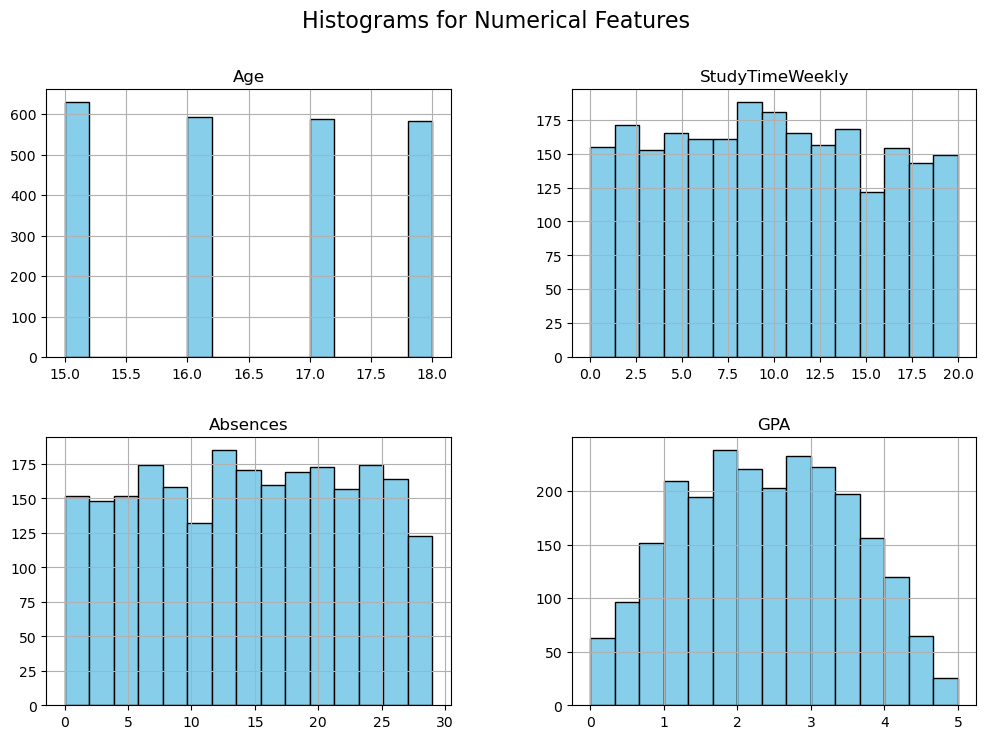

<Figure size 1200x800 with 0 Axes>

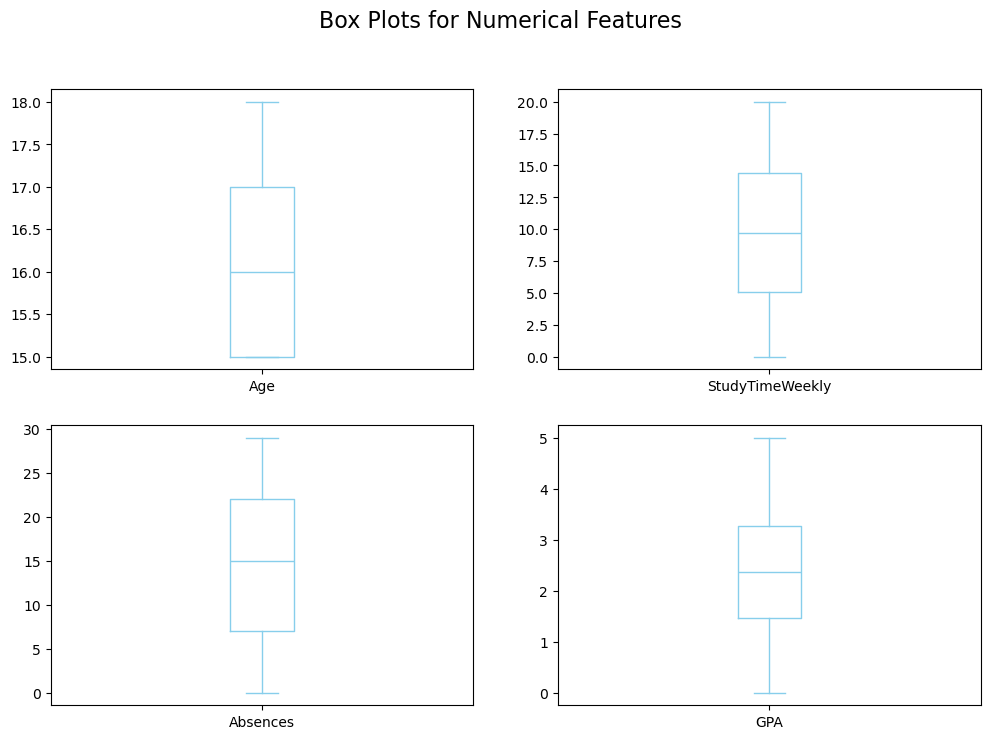

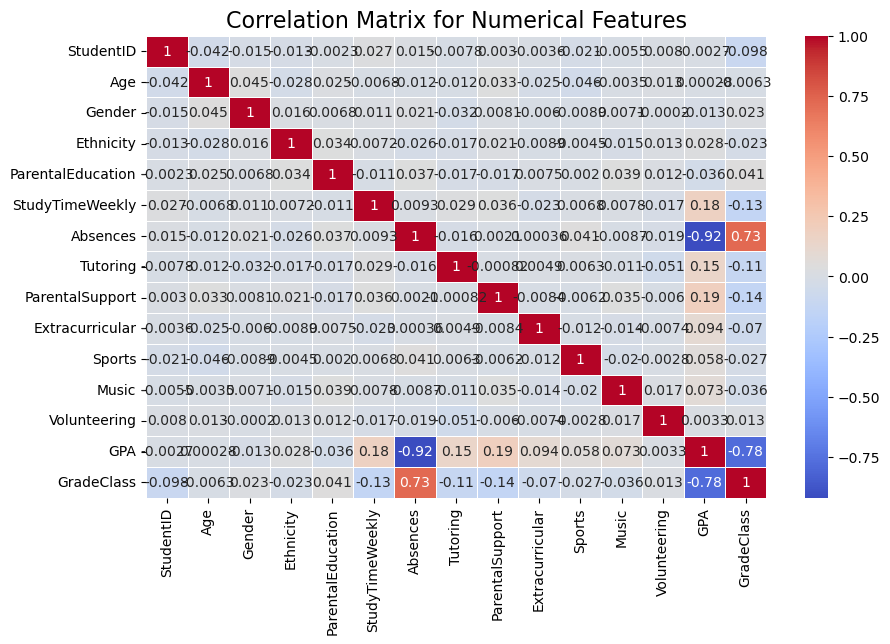

In [73]:
# Distributions for Numerical Features

# List of numerical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Create histograms for each numerical feature
df[numerical_features].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Features', fontsize=16)
plt.show()

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
df[numerical_features].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12, 8), color='skyblue')
plt.suptitle('Box Plots for Numerical Features', fontsize=16)
plt.show()

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


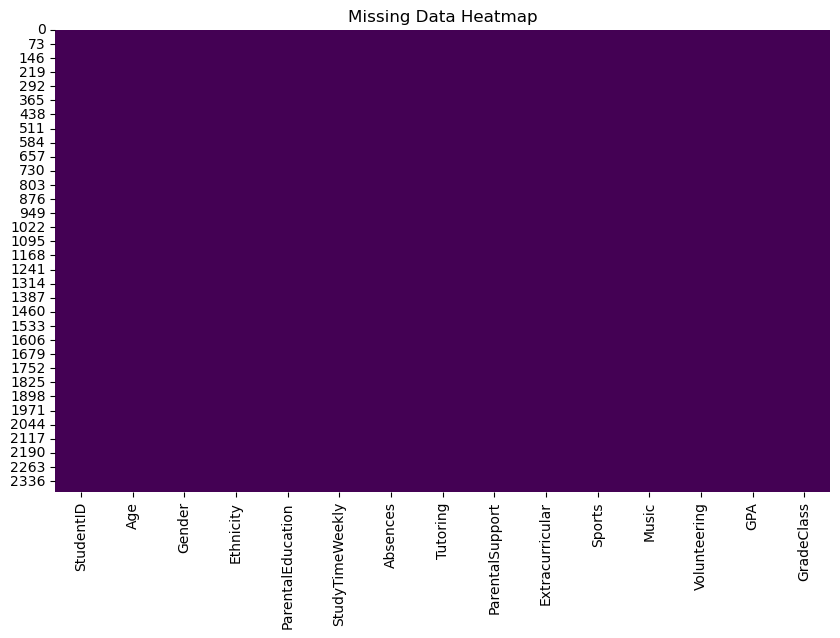

In [63]:
# MISSING DATA

# Check for missing values
missing_data = df.isnull().sum()

# Print missing data
print(missing_data)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [64]:
# CATEGORICAL DATA HANDLING

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'ParentalEducation'], drop_first=True)

# Convert boolean columns to integers (1/0)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns  # Automatically find boolean columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# Display the first few rows of the modified dataframe
print(df_encoded.head())


   StudentID  Age  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0       1001   17        19.833723         7         1                2   
1       1002   18        15.408756         0         0                1   
2       1003   15         4.210570        26         0                2   
3       1004   17        10.028829        14         0                3   
4       1005   17         4.672495        17         1                3   

   Extracurricular  Sports  Music  Volunteering       GPA  GradeClass  \
0                0       0      1             0  2.929196         2.0   
1                0       0      0             0  3.042915         1.0   
2                0       0      0             0  0.112602         4.0   
3                1       0      0             0  2.054218         3.0   
4                0       0      0             0  1.288061         4.0   

   Gender_1  Ethnicity_1  Ethnicity_2  Ethnicity_3  ParentalEducation_1  \
0         1            0           